University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence
    
## Lab 2: Optimisation and Local Search

### The Knapsack problem   
- The Knapsack problem is an optimisation problem where the goal is to maximise the total value of the objects that can be carried in a knapsack or backpack.
- You are given a dataset for an instance with 20 items that you can download from the Canvas page describing the practical. 
- The dataset is text file with two columns where the first line gives the number of items and the capacity of the knapsack. The rest of the lines give the value and weight of each item. 
- Below you can find the code to read the data files.  In order to run the code, place the data files in the same folder as the notebook.    

In [3]:
def read_knapsack_data(fname):    
    ''' Read kanpsack instance data
        Input: filename
        Output: number of items, capacity, values and weights
    '''
    with open(fname, 'r') as kfile:  # reads the whole file
        lines = kfile.readlines()     
    vs = []; ws = []                 # Empty list to store values and weights 
    bFirst = True 
    for l in lines:
        numbers = list(map(int, l.split()))  # Create list of integers from line      
        if (bFirst):            # First line contains no. if items and capacity 
            n = numbers[0]
            c = numbers[1]
            bFirst = False
        else:                   # Other lines contain values and weights
            vs.append(numbers[0])    
            ws.append(numbers[1])    
    return n, c, vs, ws

In [4]:
# Reading data from a file
knapfile = "knap20.txt"     # filename, should be located in the same directory
n, W, values, weights = read_knapsack_data(knapfile) # n = number of items, W = weight capacity of backpack
print(f'Number of items: {n}. Weight Capacity: {W}')
print(f'Values : {values}')
print(f'Weights: {weights}') 

Number of items: 20. Weight Capacity: 878
Values : [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
Weights: [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]


### Task 1. Plotting the relationship between values and wights

- Produce a scatter plot that has values as the *x* coordinate and weights as the *y* coordinate.
- Remember that it is a good practice to add axis-labels to your plots

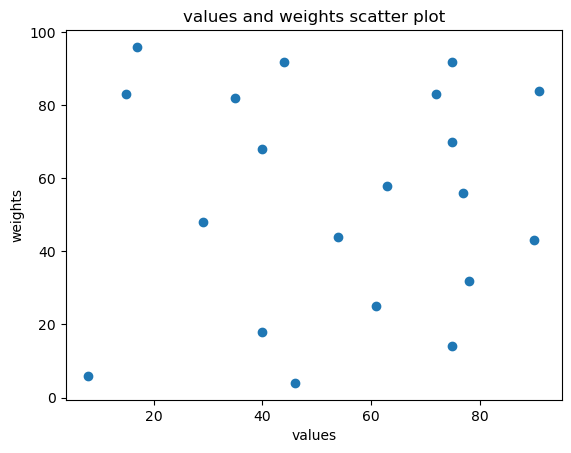

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Add your code here
plt.scatter(values, weights)
plt.xlabel("values")
plt.ylabel("weights")
plt.title("values and weights scatter plot")
plt.show()

### Generate Random Solutions
- You are given the code to generate a random binary list of 0s and 1s representing a solution to the knapsack problem
- Remember that a 1 in position *i* indicates that item *i* is in the solution.
- If we have too many 1s in a solution, the solution is likely to be invalid, that is to go over the knapsack capacity
- To increase the chance of generating a valid solution, we can generate a random binary list with more 0s than 1s
- We can do this with the parameter *weights* in *rnd.choices* function. that gives different weights to the alternative elements

In [21]:
import random as rnd

def random_sol(l):
    '''
       Returns a random solution, binary list, with more proportion of 0s than 1s
       Input: lenght of the list
       Output: binary list
    '''
    sol = rnd.choices([0,1], weights=[1,2], k = l)  
    return sol

### Task 2:  Random solutions
- Use the function above to test the generation of random solutions
- Print the solution generated
- In the rand.choices method, explore changing the values of the weights parameter to generate solutions with varied distributions of 0s and 1s (eg. [90,10], [50,50], [95,5], etc)

In [22]:
# Add your code here
solution = random_sol(n)
print(solution)

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]


### Evaluation Function
- You are given the code to evaluate the quality of a solution
- The function receives a solution as a list, and returns the total value of the items in the sack, and the total weight of the solution
- Notice that we return a total value of zero for invalid solutions, that is, solutions that have a weight that exceeds the capacity of the sack

In [23]:
def evaluate(sol):
    '''
      Evaluates a solution returning its total value and weight
      Input: solution as a list of binary digits
      Output: total value and weight of the solution
    '''
    total_wei = 0
    total_val = 0
    for i in range(n):
        total_wei = total_wei + (sol[i] * weights[i])
        total_val = total_val + (sol[i] * values[i])
        
    capacity = W
    if total_wei > capacity:
        total_val = 0
    
    return total_val, total_wei

### Task 3: Evaluate a Solution
- Use the function above to calculate the value and weight of randomly generated solutions
- Print the weight and value of the solution
- What is the best value you can get after trying different random solutions?


In [24]:
# Add your code here
solution = random_sol(n)
value, weight = evaluate(solution)
print(f"value: {value} and weight: {weight}")

value: 507 and weight: 612


### Neighbourhood Function

- You are given the code to generate a random neighbour from a given solution
- The function creates a new solution that alters a single bit from the original solution 


In [25]:
def neighbour(sol):   
    ''' Generate a random 1-bit flip neigbour of the given solution
        Input: solution as binary list
        Output: Solution in the 1-bit flip neighbourh
    '''    
    neig = sol.copy()                 # copy solution
    i = rnd.randint(0,n-1)
    neig[i] = 0 if sol[i]== 1 else 1  # alter position i if 0 assign 1,else assign 1
    return neig

#### Task 4: Neighbours
- Use the function above to test generation of neighbour solutions
- Print both the initial solution and the neighbour solution generated

In [26]:
# Add your code here
print(f"weight capacity: {W}")
solution = random_sol(n)
value, weight = evaluate(solution)
print(solution)
print(f"value: {value} and weight: {weight}")
neighbourSolution = neighbour(solution)
neighbourValue, neighbourWeight = evaluate(neighbourSolution)
print(neighbourSolution)
print(f"neighbour value: {neighbourValue} and neighbour weight: {neighbourWeight}")

weight capacity: 878
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
value: 862 and weight: 754
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
neighbour value: 847 and neighbour weight: 671


### Task 5: Implement a Hill-climber
- Using the various functions implemented above: random_sol, evaluate, neighbour
- Your task is to implement a hill_climber algorithm according to this Pseudocode


>generate a random solution *s* <br>
>evaluate the solution *s* <br>
>for a number of iterations <br>
>>generate *s'* a random neighbour of solution *s* <br>
>>evaluate *s'*<br>
>>if value of *s'* >= value of *s* <br>
>>>assign *s'* to *s*   <br>

>return final value, weight and solution found<br>
---
**Tip**: Remember that assigning a list variable to another in Python (i.e. a = b), only has the effect of having the two variable names referencing to the same list object, it does not create a new object. In order assign (copy) list *b* into a list *a* in Python, you should use one of this alternatives:
- a = b.copy()   use the copy method of the object list
- a = list(b)    use the function list, which creates a new list using object b as input
- a = b[:]       use the slicing operator taking all elements of the list (from beginning to end)

In [27]:
def hill_climber(maxiter):
    ''' Hill climbing algorithm for a maximum number of iterations"
        Input: integer with the number of iterations to run
        Output: The solution at the end of hill-climing, is value and weight 
    '''
    numberOfItems = n
    solution = random_sol(numberOfItems)
    solutionValue, solutionWeight = evaluate(solution)
    for iteration in range(maxiter):
        neighbourSolution = neighbour(solution)
        neighbourValue, neighbourWeight = evaluate(neighbourSolution)
        if neighbourValue > solutionValue:
            solution = neighbourSolution.copy()
    return solution

# Add your code here

### Task 6: Use the Hill-climber
- Using the hill_climber function to solve the knapsack instance
- Experiment with several values of the number of maximum iterations
- Print the results of a run: including Value, Weight and the solution.
- What is the best value you can get after running hill-climbing?
- Can you obtain better results than by only generating random solutions? (as you did in Task 3)

In [28]:
# Add your code here
solution = hill_climber(100_000_000)
solutionValue, solutionWeight = evaluate(solution)
print(f"weight capacity: {W}\nsolution value: {solutionValue} and solution weight: {solutionWeight}")

weight capacity: 878
solution value: 782 and solution weight: 722


### Task 7: Plot the hill_climber value trace

- Add a variable list called 'trace' to your hill_climber implementation to keep a record of the values of the solutions explored by the algorithm
- Your algorithm should add values to the trace list and return this list at the end of the run
- Explore two places to add the current trace to the list
   - Add the values of all the solutions visited
   - Add the values of the solutions that improve the previos solution only
  
- Produce line plots with markers of your trace for the two alternatives
- Can you see a trend of improving the values across the search process?
- How the two plots differ?

In [110]:
# Add your code here
import matplotlib.pyplot as plt

def hill_climber_with_traces(maxiter):
    ''' Hill climbing algorithm for a maximum number of iterations"
        Input: integer with the number of iterations to run
        Output: The solution at the end of hill-climing, its value and weight, and the list of all improving solutions.
    '''
    numberOfItems = n
    completeTrace = []
    improvedTrace = []
    iters = []
    solution = random_sol(numberOfItems)
    solutionValue, solutionWeight = evaluate(solution)
    completeTrace.append(solutionValue)
    improvedTrace.append(solutionValue)
    iters.append(1)
    for iteration in range(maxiter):
        neighbourSolution = neighbour(solution)
        neighbourValue, neighbourWeight = evaluate(neighbourSolution)
        completeTrace.append(neighbourValue)
        if neighbourValue > solutionValue:
            solution = neighbourSolution.copy()
            solutionValue = neighbourValue
            iters.append(iteration + 1)
            improvedTrace.append(solutionValue)
    return solution, completeTrace, improvedTrace, iters

# line plots with markers of your trace for the two alternatives: 

# running the trace
iterations = 100
solution, completeTrace, improvedTrace, iters = hill_climber_with_traces(iterations)



In [111]:
print(improvedTrace)
print(iters)
print(completeTrace)

[721, 750, 796, 886]
[1, 4, 15, 19]
[721, 677, 686, 646, 750, 0, 715, 675, 733, 687, 0, 0, 675, 733, 710, 796, 752, 724, 721, 886, 842, 795, 795, 809, 0, 0, 0, 0, 795, 832, 846, 832, 814, 846, 0, 869, 0, 823, 0, 809, 851, 814, 0, 809, 857, 795, 809, 869, 823, 809, 796, 0, 0, 869, 842, 0, 811, 0, 842, 0, 796, 0, 869, 842, 0, 809, 823, 811, 842, 869, 0, 846, 869, 842, 842, 851, 832, 795, 840, 823, 796, 842, 851, 808, 832, 0, 823, 0, 811, 0, 811, 840, 0, 811, 842, 840, 0, 846, 0, 809, 0]


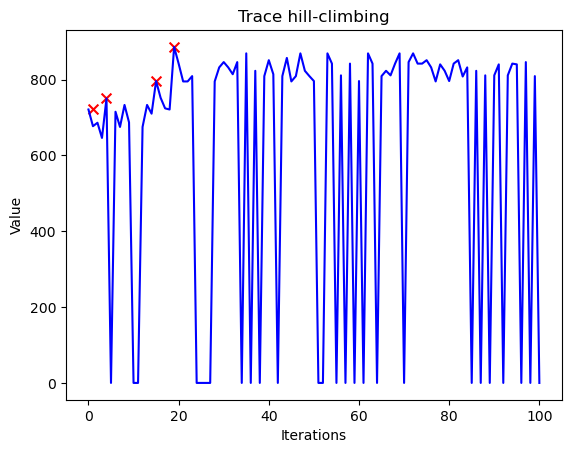

In [113]:
# trace with all values visited
# plt.plot(completeTrace, color="blue")
plt.scatter(iters, improvedTrace, color = "red", s = 50, marker = "x")
plt.plot(completeTrace, color = "blue")
plt.title("Trace hill-climbing")
plt.ylabel("Value")
plt.xlabel("Iterations")
plt.show()

# trace with better solutions only
# plt.plot(improvedTrace)

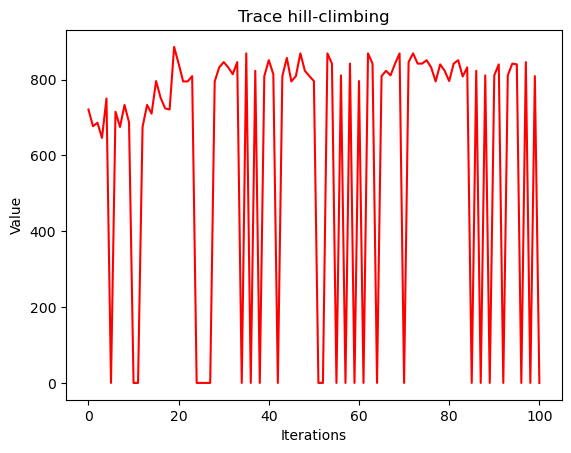

In [115]:
# trace with all values visited
# plt.plot(completeTrace, color="blue")
plt.plot(completeTrace, color="red")
plt.title("Trace hill-climbing")
plt.ylabel("Value")
plt.xlabel("Iterations")
plt.show()

# trace with better solutions only
# plt.plot(improvedTrace)